In [69]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("filtered_data.csv");


In [74]:
tickers = list(df.columns.values);
def unit(ticker, warrantFrac):
    idx = tickers.index(ticker)
    commonCol = df[tickers[idx]]
    warrantCol = df[tickers[idx + 1]]
    unitCol = df[tickers[idx + 2]]
    diff = []
    unitPriceList = []
    pseudoUnitPriceList = []
    dates = []
    for row in range(commonCol.shape[0]):
        commonPrice = commonCol[row]
        warrantPrice = warrantCol[row]
        unitPrice = unitCol[row]
        if (commonPrice > 0 and warrantPrice > 0 and unitPrice > 0):
            diff.append(warrantPrice * warrantFrac + commonPrice - unitPrice)
            dates.append(df["Date"][row])
            unitPriceList.append(unitPrice)
            pseudoUnitPriceList.append(warrantPrice * warrantFrac + commonPrice)
    plt.plot(dates, diff)
    plt.show()
    
    plt.plot(dates, unitPriceList)
    plt.plot(dates, pseudoUnitPriceList)

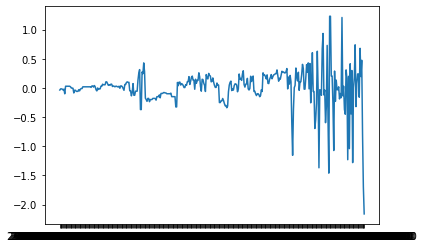

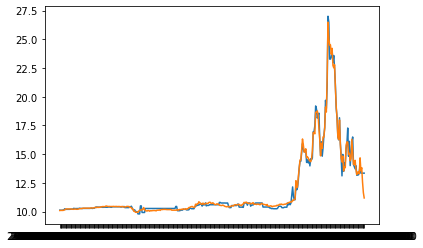

In [75]:
unit("ASTS", 0.5)